## Gender Pay Gap

Team members:

    Ashwath Ramesh
    Jordan Farrell
    Julio Oliveira
    Junjun Tao
    Satoshi Taniguchi
    William Teodecki

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter
from scipy import stats

In [ ]:
#Importing data

#PSID ORIGINAL DATA
data = pd.read_csv(r"PanelStudyIncomeDynamics.csv")
col_name = ['sex','age', 'annhrs','annlabinc', 'white','black','hisp','degree', 'yrsexp', 'yrsftexp', 'yrsptexp','hrwage', 'northeast','northcentral','south','west', 'manager','business','financialop','computer','architect','scientist','socialworker','postseceduc','legaleduc','artist','lawyerphysician','healthcare','healthsupport','protective','foodcare','building','sales', 'officeadmin', 'constructextractinstall', 'production', 'transport']
data = data[col_name]

# CPS ORIGINAL DATA
data_1 = pd.read_csv(r"CurrentPopulationSurvey.csv")
col_name = ['year','sex','age','annhrs','incwage','sch','hrwage','white','black','hisp','northeast','northcentral','south','west', 'manager','business','financialop','computer','architect','scientist','socialworker','postseceduc','legaleduc','artist','lawyerphysician','healthcare','healthsupport','protective','foodcare','building','sales', 'officeadmin', 'constructextractinstall', 'production', 'transport']
data_1 = data_1[col_name]

# Removing one hot encoding and adding label encoding to the data

I had to go the roundabout way of doing this, because my PC couldn't handle neither merge nor append functions

Remove the # infornt of to_csv statements to save the file into your device

In [73]:
#Use if you already did the process below and saved the file, run this by removing the #
#If you already have the preprocessed skip until after data cleaning part and its subsections
psid = pd.read_csv('psid.csv')
#cat_col = ['sex','degree','race','job','region']
#psid[cat_col] = psid[cat_col].astype('category')
cps = pd.read_csv('cps.csv')
#cat_col = ['sex','degree','race','job','region']
#cps[cat_col] = cps[cat_col].astype('category')

In [ ]:
#Remove the # infront of .to_csv to save the file and run this code

##########################
#PSID
##########################
#Creating race
race = data.copy()
race_col = ['white','black','hisp']
race = race[race_col]
race['race'] = race.idxmax(1)
race = race.drop(columns=race_col)
data = data.drop(columns=race_col)

#Creating region
region = data.copy()
region_col = ['northeast', 'northcentral', 'south', 'west']
region = region[region_col]
region['region'] = region.idxmax(1)
region = region.drop(columns=region_col)
data = data.drop(columns=region_col)

#Creating job
job = data.copy()
job_col = ['manager','business', 'financialop', 'computer', 'architect', 'scientist', 'socialworker', 'postseceduc', 'legaleduc', 'artist', 'lawyerphysician', 'healthcare', 'healthsupport', 'protective', 'foodcare', 'building', 'sales', 'officeadmin', 'constructextractinstall', 'production', 'transport']
job = job[job_col]
job['job'] = job.idxmax(1)
job = job.drop(columns=job_col)
data = data.drop(columns=job_col)

#Label encoding
psid = pd.DataFrame()

data_col = list(data.columns)
psid = data[data_col]

psid['race'] = race['race']
psid['job'] = job['job']
psid['region'] = region['region']

psid["race"] = psid["race"].astype('category')
psid["race"] = psid["race"].cat.codes

psid["job"] = psid["job"].astype('category')
psid["job"] = psid["job"].cat.codes

psid["region"] = psid["region"].astype('category')
psid["region"] = psid["region"].cat.codes
#psid.to_csv('psid.csv',index=False)

#Getting Category codes

#Getting job codes
job['job'] = job['job'].astype('category')
job['job_cat_code'] = job['job'].cat.codes
job['job'] = job['job'].astype('string')
job['job_cat_code'] = job['job_cat_code'].astype('string')
df = pd.DataFrame()
df['job_code'] = job[['job_cat_code', 'job']].agg(','.join, axis=1)
dff = pd.DataFrame()
dff['job_code'] = df['job_code'].unique()
#dff.to_csv('job_code.csv', index=False)

#Getting Region code
region['region'] = region['region'].astype('category')
region['region_cat_code'] = region['region'].cat.codes
region['region'] = region['region'].astype('string')
region['region_cat_code'] = region['region_cat_code'].astype('string')
ef = pd.DataFrame()
ef['region_code'] = region[['region_cat_code','region']].agg(','.join, axis=1)
eff = pd.DataFrame()
eff['region_code'] = ef['region_code'].unique()
#eff.to_csv('region_code.csv', index=False)

#Getting Race code
race['race'] = race['race'].astype('category')
race['race_cat_code'] = race['race'].cat.codes
race['race'] = race['race'].astype('string')
race['race_cat_code'] = race['race_cat_code'].astype('string')
ff = pd.DataFrame()
ff['race_code'] = race[['race_cat_code', 'race']].agg(','.join, axis=1)
fff = pd.DataFrame()
fff['race_code'] = ff['race_code'].unique()
#fff.to_csv('race_code.csv', index=False)

#Rounding up years of experience

psid['yrsexp'] = psid['yrsexp'].apply(np.ceil)
psid['yrsftexp'] = psid['yrsftexp'].apply(np.ceil)
psid['yrsptexp'] = psid['yrsptexp'].apply(np.ceil)

#Savinng the data
#psid.to_csv('psid.csv', index=False)

cat_col = ['sex','degree','race','job','region']
psid[cat_col] = psid[cat_col].astype('category')

##########################
#CPS
##########################

#Creating race
race = data_1.copy()
race_col = ['white','black','hisp']
race = race[race_col]
race['race'] = race.idxmax(1)
race = race.drop(columns=race_col)
data_1 = data_1.drop(columns=race_col)

#Creating region
region = data_1.copy()
region_col = ['northeast', 'northcentral', 'south', 'west']
region = region[region_col]
region['region'] = region.idxmax(1)
region = region.drop(columns=region_col)
data_1 = data_1.drop(columns=region_col)

#Creating job
job = data_1.copy()
job_col = ['manager','business', 'financialop', 'computer', 'architect', 'scientist', 'socialworker', 'postseceduc', 'legaleduc', 'artist', 'lawyerphysician', 'healthcare', 'healthsupport', 'protective', 'foodcare', 'building', 'sales', 'officeadmin', 'constructextractinstall', 'production', 'transport']
job = job[job_col]
job['job'] = job.idxmax(1)
job = job.drop(columns=job_col)
data_1 = data_1.drop(columns=job_col)

#Label encoding
cps = pd.DataFrame()

data_col = list(data_1.columns)
cps = data_1[data_col]

cps['race'] = race['race']
cps['job'] = job['job']
cps['region'] = region['region']

cps["race"] = cps["race"].astype('category')
cps["race"] = cps["race"].cat.codes

cps["job"] = cps["job"].astype('category')
cps["job"] = cps["job"].cat.codes

cps["region"] = cps["region"].astype('category')
cps["region"] = cps["region"].cat.codes

#Binning sch
for index, x in cps.iterrows():
    if cps['sch'].iloc[index] <= 10:
        cps['sch'].iloc[index] = 0
    elif cps['sch'].iloc[index] > 10 and cps['sch'].iloc[index] <= 15:
        cps['sch'].iloc[index] = 1
    elif cps['sch'].iloc[index] > 15:
        cps['sch'].iloc[index] = 2

#Renaming column
cps = cps.rename(columns={'sch':'degree','incwage':'annlabinc'})

#cps.to_csv('cps.csv',index=False)


#Getting Category codes

#Getting job codes
job['job'] = job['job'].astype('category')
job['job_cat_code'] = job['job'].cat.codes
job['job'] = job['job'].astype('string')
job['job_cat_code'] = job['job_cat_code'].astype('string')
df = pd.DataFrame()
df['job_code'] = job[['job_cat_code', 'job']].agg(','.join, axis=1)
dff = pd.DataFrame()
dff['job_code'] = df['job_code'].unique()
#dff.to_csv('job_code.csv', index=False)

#Getting Region code
region['region'] = region['region'].astype('category')
region['region_cat_code'] = region['region'].cat.codes
region['region'] = region['region'].astype('string')
region['region_cat_code'] = region['region_cat_code'].astype('string')
ef = pd.DataFrame()
ef['region_code'] = region[['region_cat_code','region']].agg(','.join, axis=1)
eff = pd.DataFrame()
eff['region_code'] = ef['region_code'].unique()
#eff.to_csv('region_code.csv', index=False)

#Getting Race code
race['race'] = race['race'].astype('category')
race['race_cat_code'] = race['race'].cat.codes
race['race'] = race['race'].astype('string')
race['race_cat_code'] = race['race_cat_code'].astype('string')
ff = pd.DataFrame()
ff['race_code'] = race[['race_cat_code', 'race']].agg(','.join, axis=1)
fff = pd.DataFrame()
fff['race_code'] = ff['race_code'].unique()
#fff.to_csv('race_code.csv', index=False)

cat_col = ['sex','degree','race','job','region']
cps[cat_col] = cps[cat_col].astype('category')

# Descriptive Analytics

before data cleaning

Do people of different genders with similar professions and education earn money differently? 

Earnings of different genders with similar profession

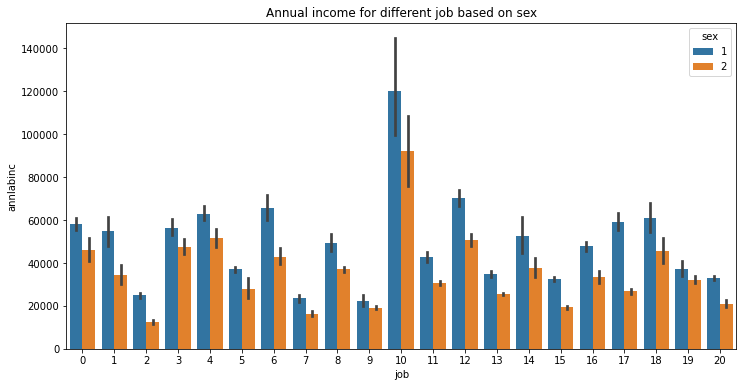

In [11]:
earnings_1 = plt.subplots(figsize=(12, 6))
earnings_1 =sns.barplot(x=psid['job'], y=psid['annlabinc'], hue=psid['sex']).set(title= 'Annual income for different job based on sex')
plt.show(earnings_1)

Earnings of different genders with similar education

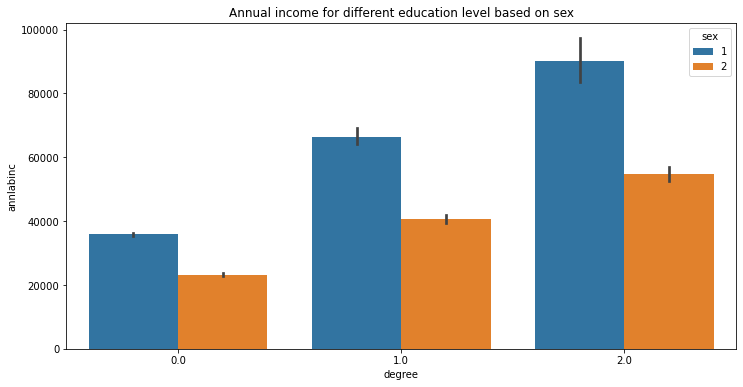

In [76]:
earnings_2 = plt.subplots(figsize=(12, 6))
earnings_2 =sns.barplot(x=psid['degree'], y=psid['annlabinc'], hue=psid['sex']).set(title= 'Annual income for different education level based on sex')
plt.show(earnings_2)

Earnings of different genders with similar race

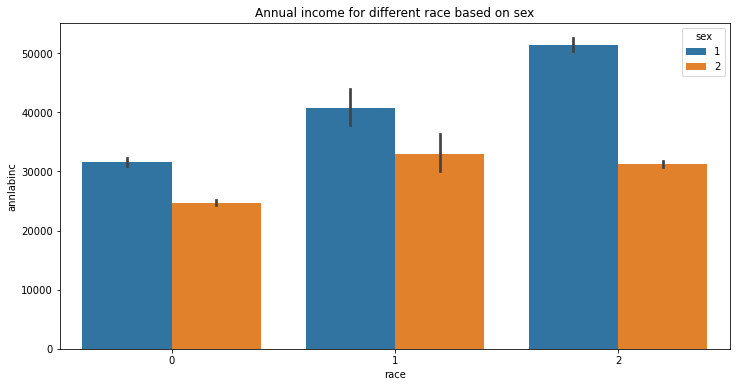

In [75]:
earnings_3 = plt.subplots(figsize=(12, 6))
earnings_3 =sns.barplot(x=psid['race'], y=psid['annlabinc'], hue=psid['sex']).set(title= 'Annual income for different race based on sex')
plt.show(earnings_3)

Earnings of different genders with similar region

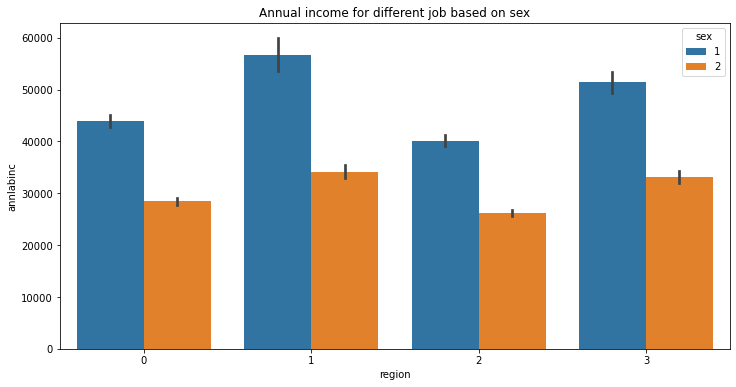

In [14]:
earnings_4 = plt.subplots(figsize=(12, 6))
earnings_4 =sns.barplot(x=psid['region'], y=psid['annlabinc'], hue=psid['sex']).set(title= 'Annual income for different job based on sex')
plt.show(earnings_4)

distribution of labor income

,sumsquare_error,aic,bic,kl_div
chi2,1.402789e-11,8022.927868,-1.182466e+06,inf
expon,8.829477e-11,6155.790778,-1.121036e+06,inf
norm,2.396454e-10,42587.165871,-1.087689e+06,inf
lognorm,7.046555e-10,3425.914448,-1.051657e+06,inf


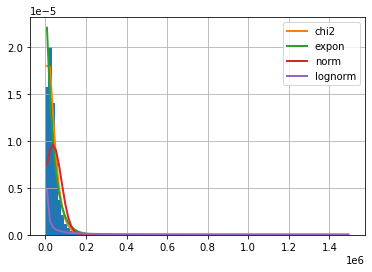

In [15]:
f = Fitter(psid.annlabinc,
           distributions=['lognorm',
                          "norm", "expon","chi2"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
chi2,2.789037e-11,6390.817155,-1.275647e+07,inf
expon,1.144373e-10,5292.091014,-1.227044e+07,inf
norm,2.944910e-10,25758.144573,-1.194501e+07,inf
lognorm,7.936681e-10,3384.179782,-1.160367e+07,inf


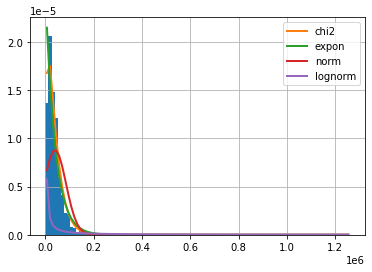

In [16]:
f_1 = Fitter(cps.annlabinc,
           distributions=['lognorm',
                          "norm", "expon","chi2"])
f_1.fit()
f_1.summary()

The labor income distribution is skewed to the right, meaning that a small amount of people will make a lot of money. In order to focus our analysis in the overall population we filter out the 10% highest incomes by selecting the 90th percentile.

Count of male and female in the dataset

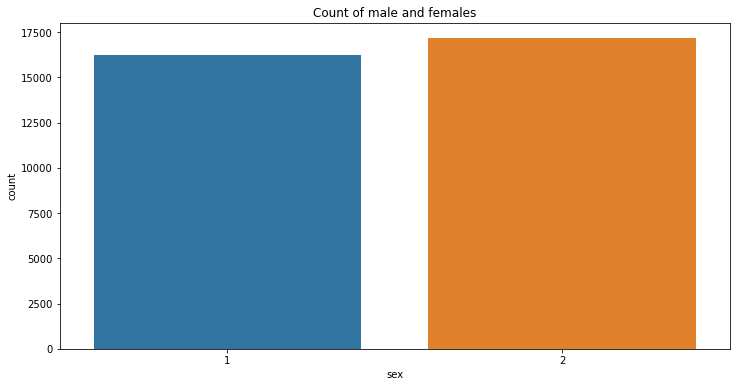

In [17]:
sex_count = plt.subplots(figsize=(12, 6))
sex_count = sns.countplot(x = psid['sex']).set(title = 'Count of male and females')

Count of each race

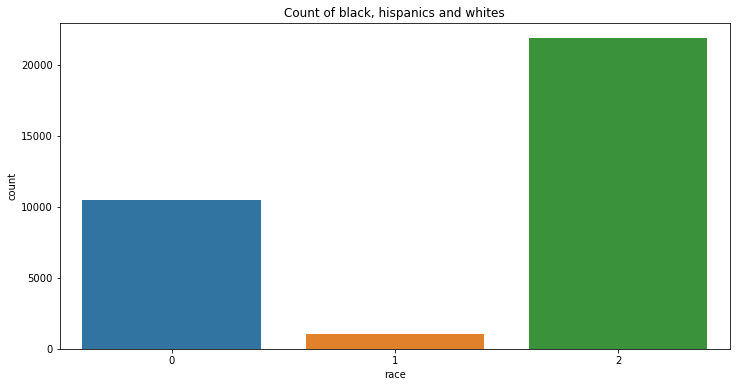

In [18]:
race_count = plt.subplots(figsize=(12, 6))
race_count = sns.countplot(x = psid['race']).set(title = 'Count of black, hispanics and whites')

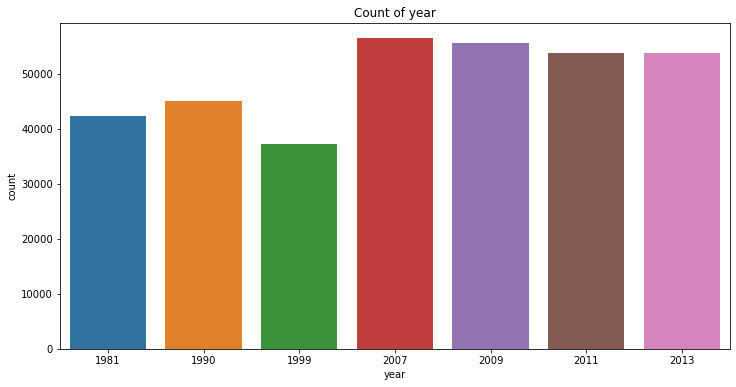

In [19]:
year_count = plt.subplots(figsize=(12, 6))
year_count = sns.countplot(x = cps['year']).set(title = 'Count of year')

Scatter and histogram plots

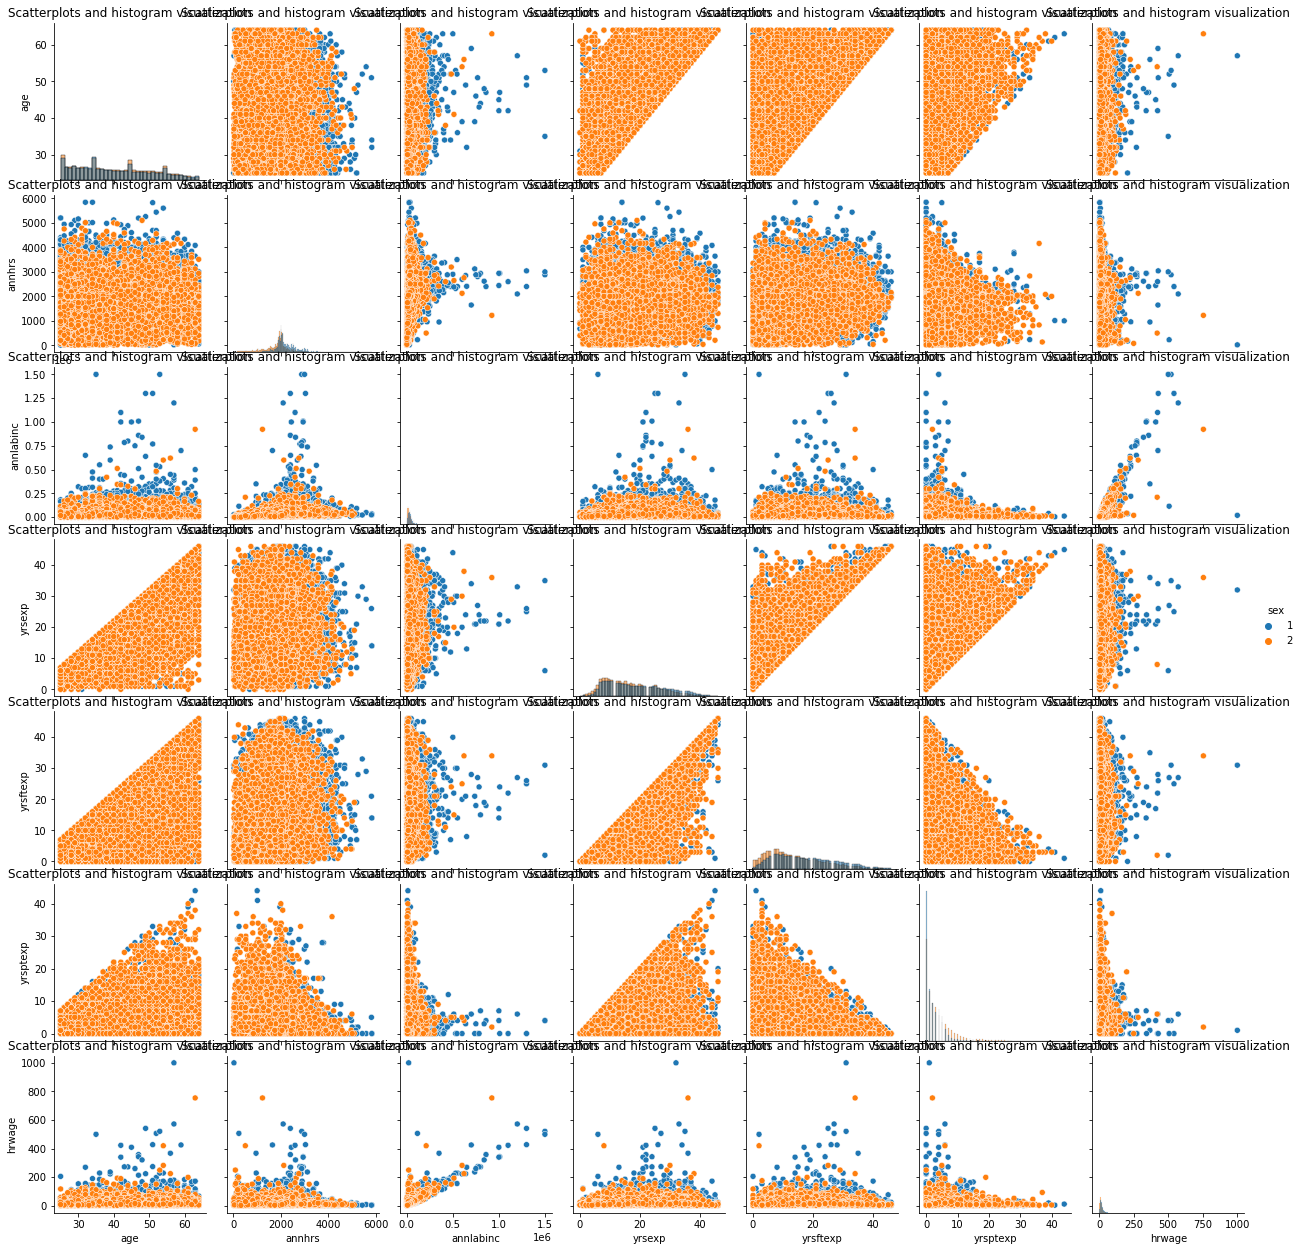

In [20]:
sca_hist = sns.PairGrid(psid, hue="sex").set(title= 'Scatterplots and histogram visualization')
sca_hist.map_diag(sns.histplot)
sca_hist.map_offdiag(sns.scatterplot)
sca_hist.add_legend()

My PC doesnt have the capacity to handle this data for this plot. If someone can do it and add it would be nice

In [ ]:
#sca_hist_1 = sns.PairGrid(cps, hue="sex")
#sca_hist_1.map_diag(sns.histplot)
#sca_hist_1.map_offdiag(sns.scatterplot)
#sca_hist_1.add_legend()

Correlation Matrix

For PSID dataset

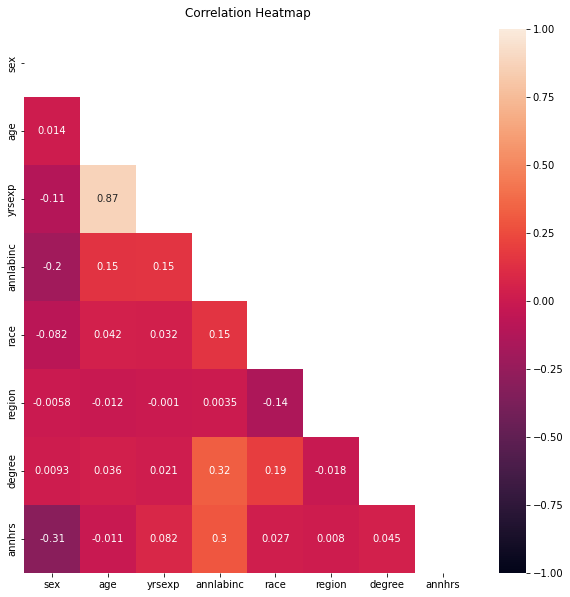

In [25]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(psid[['sex','age','yrsexp','annlabinc','race','region','degree','annhrs']].corr(), vmin=-1, vmax=1, annot=True,mask=np.triu(psid[['sex','age','yrsexp','annlabinc','race','region','degree','annhrs']].corr()))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Observations:

i)age has a strong positive relationship with years of experiance

ii)Sex has a strong negative relationship with race, which is interesting

iii)Region and degree does not seem to affect any of the other attributes, which in the case of degree is interesting

For CPS dataset

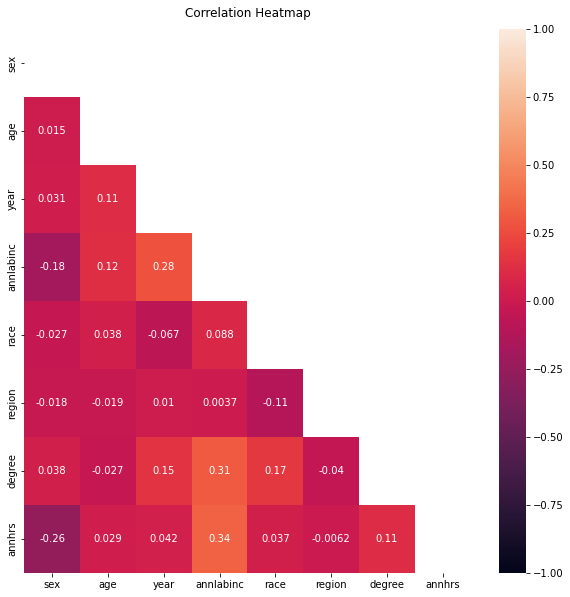

In [26]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(cps[['sex','age','year','annlabinc','race','region','degree','annhrs']].corr(), vmin=-1, vmax=1, annot=True,mask=np.triu(cps[['sex','age','year','annlabinc','race','region','degree','annhrs']].corr()))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Data Cleaning

### Missing data

In [28]:
psid.isnull().sum()

sex           0
age           0
annhrs        0
annlabinc     0
degree       40
yrsexp        0
yrsftexp      0
yrsptexp      0
hrwage        0
race          0
job           0
region        0
dtype: int64

We found that we had 40 missing values in the degree attribute, since this was a survey, some of the people with low degree would not like to share their education information, hence we considered their degree as 0 instead of removing it. 

In [29]:
cps.isnull().sum()

year         0
sex          0
age          0
annhrs       0
annlabinc    0
degree       0
hrwage       0
race         0
job          0
region       0
dtype: int64

There are no missing value. 

Possible reason is that the data was mostly cleaned and posted to kaggle

In [30]:
#Handling missing data
psid.degree.fillna(0, inplace=True)

### Outliers

Previously from the distribution of labour income plot we could see that the plot is highly skewed by those value above 90th percentile. Hence we remove it

In [31]:
#PSID
q_9 = psid.annlabinc.quantile(0.9)
psid = psid[psid.annlabinc < q_9]

#CPS
q_9_1 = cps.annlabinc.quantile(0.9)
cps = cps[cps.annlabinc < q_9]

,sumsquare_error,aic,bic,kl_div
chi2,7.111866e-09,2292.280928,-867181.663434,0.194810
lognorm,7.271420e-09,2295.473729,-866519.673876,0.200876
norm,8.002608e-09,2298.245123,-863671.115735,0.229026
expon,1.298361e-08,2301.597488,-849232.394623,0.300793


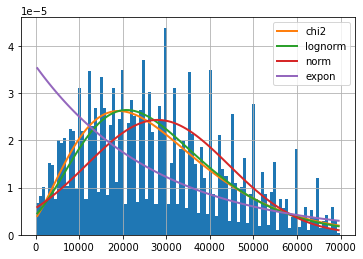

In [32]:
f = Fitter(psid.annlabinc,
           distributions=['lognorm',
                          "norm", "expon","chi2"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
lognorm,1.372958e-08,2294.118198,-9.191291e+06,0.337983
norm,1.476965e-08,2295.088004,-9.169451e+06,0.389173
expon,1.943120e-08,2301.332773,-9.087360e+06,0.400928
chi2,3.775031e-08,855487.995591,-8.888600e+06,5.416157


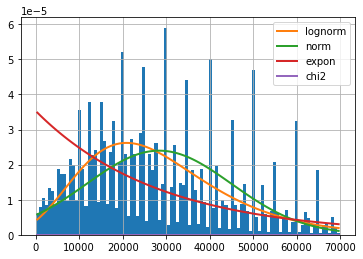

In [33]:
f = Fitter(cps.annlabinc,
           distributions=['lognorm',
                          "norm", "expon","chi2"])
f.fit()
f.summary()

We can see that the data is not as skewed as before

### Outliers in each attribute in PSID dataset

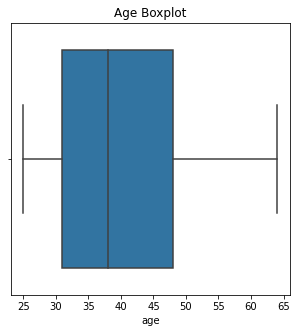

In [34]:
psid_box_1 = plt.figure(figsize=(5,5))
psid_box_1 = sns.boxplot(x = 'age', data=psid).set(title='Age Boxplot')

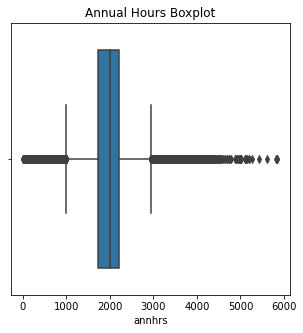

In [35]:
psid_box_2 = plt.figure(figsize=(5,5))
psid_box_2 = sns.boxplot(x = 'annhrs', data=psid).set(title='Annual Hours Boxplot')

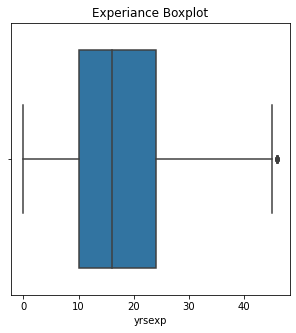

In [36]:
psid_box_3 = plt.figure(figsize=(5,5))
psid_box_3 = sns.boxplot(x = 'yrsexp', data=psid).set(title='Experiance Boxplot')

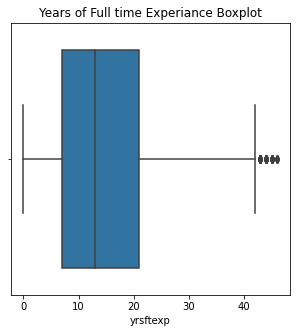

In [37]:
psid_box_4 = plt.figure(figsize=(5,5))
psid_box_4 = sns.boxplot(x = 'yrsftexp', data=psid).set(title='Years of Full time Experiance Boxplot')

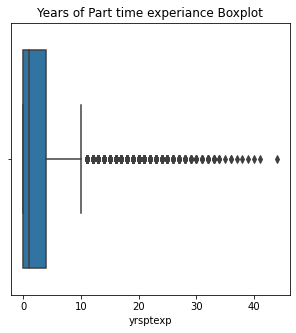

In [38]:
psid_box_5 = plt.figure(figsize=(5,5))
psid_box_5 = sns.boxplot(x = 'yrsptexp', data=psid).set(title='Years of Part time experiance Boxplot')

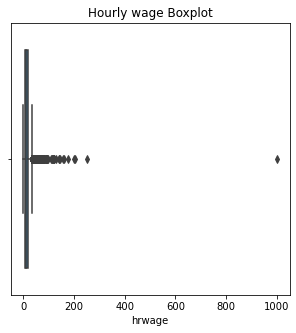

In [39]:
psid_box_6 = plt.figure(figsize=(5,5))
psid_box_6 = sns.boxplot(x = 'hrwage', data=psid).set(title='Hourly wage Boxplot')

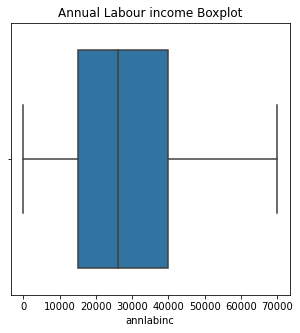

In [40]:
psid_box_7 = plt.figure(figsize=(5,5))
psid_box_7 = sns.boxplot(x = 'annlabinc', data=psid).set(title='Annual Labour income Boxplot')

### Outliers in CPS Dataset

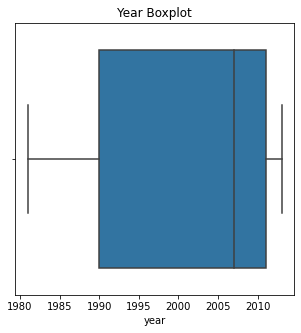

In [41]:
psid_box_1_1 = plt.figure(figsize=(5,5))
psid_box_1_1 = sns.boxplot(x = 'year', data=cps).set(title='Year Boxplot')

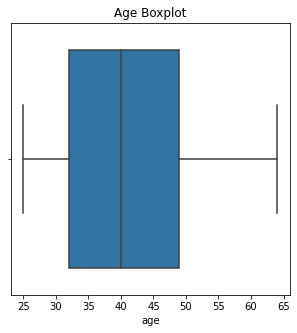

In [42]:
psid_box_1_2 = plt.figure(figsize=(5,5))
psid_box_1_2 = sns.boxplot(x = 'age', data=cps).set(title='Age Boxplot')

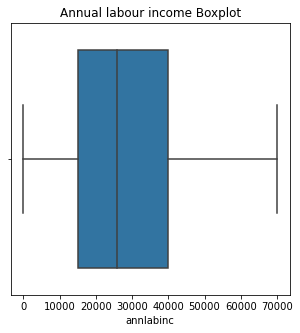

In [44]:
psid_box_1_4 = plt.figure(figsize=(5,5))
psid_box_1_4 = sns.boxplot(x = 'annlabinc', data=cps).set(title='Annual labour income Boxplot')

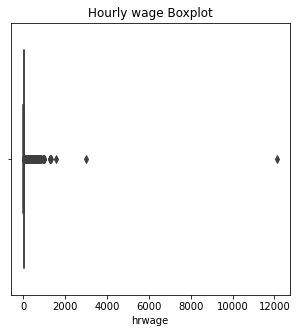

In [45]:
psid_box_1_5 = plt.figure(figsize=(5,5))
psid_box_1_5 = sns.boxplot(x = 'hrwage', data=cps).set(title='Hourly wage Boxplot')

### Removing Outliers

In [77]:
#If you have already removed all the outliers run this code to get the cleaned data
#psid = pd.read_csv('psid_preprocessed.csv')
#cps = pd.read_csv('cps_preprocessed.csv')

In [46]:
col_out_psid = ['age','annhrs','yrsexp','yrsftexp','yrsptexp','hrwage','annlabinc'] 
Q1 = psid[col_out_psid].quantile(0.25)
Q3 = psid[col_out_psid].quantile(0.75)
IQR = Q3 - Q1

psid = psid[~((psid[col_out_psid] < (Q1 - 1.5 * IQR)) |(psid[col_out_psid] > (Q3 + 1.5 * IQR))).any(axis=1)]
psid = psid.dropna()
#psid.to_csv('psid_preprocessed.csv', index=False)

In [47]:
col_out_cps = ['age','annhrs','year','hrwage','annlabinc'] 
Q1 = cps[col_out_cps].quantile(0.25)
Q3 = cps[col_out_cps].quantile(0.75)
IQR = Q3 - Q1

cps = cps[~((cps[col_out_cps] < (Q1 - 1.5 * IQR)) |(cps[col_out_cps] > (Q3 + 1.5 * IQR))).any(axis=1)]
cps = cps.dropna()
#cps.to_csv('cps_preprocessed.csv', index=False)

## Plots after Data Cleaning

Do people of different genders with similar professions and education earn money differently? 

Earnings of different genders with similar profession

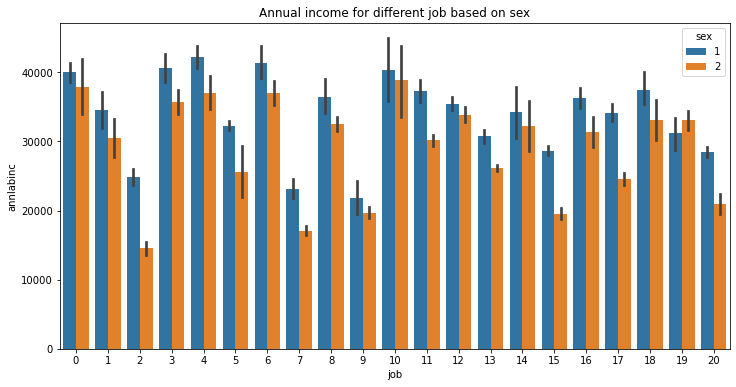

In [91]:
earnings_1 = plt.subplots(figsize=(12, 6))
earnings_1 =sns.barplot(x=psid['job'], y=psid['annlabinc'], hue=psid['sex']).set(title= 'Annual income for different job based on sex')
plt.show(earnings_1)

Earnings of different genders with similar education

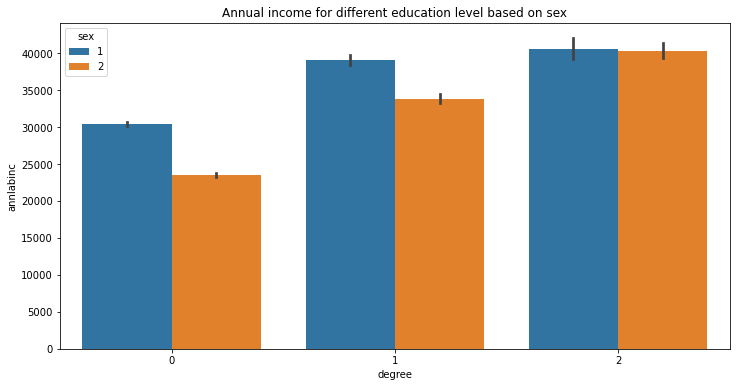

In [72]:
earnings_2 = plt.subplots(figsize=(12, 6))
earnings_2 =sns.barplot(x=psid['degree'], y=psid['annlabinc'], hue=psid['sex']).set(title= 'Annual income for different education level based on sex')
plt.show(earnings_2)

Earnings of different genders with similar race

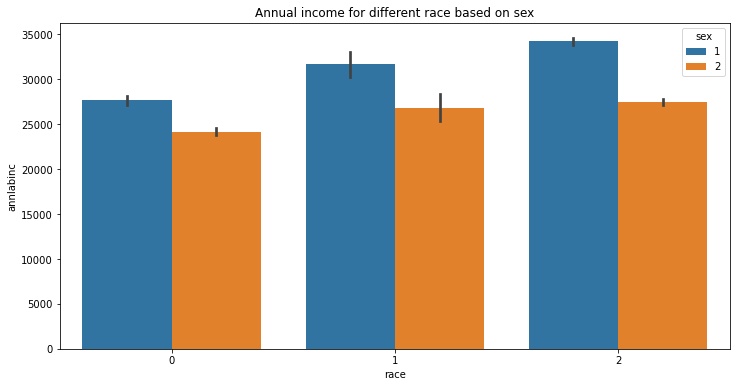

In [92]:
earnings_3 = plt.subplots(figsize=(12, 6))
earnings_3 =sns.barplot(x=psid['race'], y=psid['annlabinc'], hue=psid['sex']).set(title= 'Annual income for different race based on sex')
plt.show(earnings_3)

Earnings of different genders with similar region

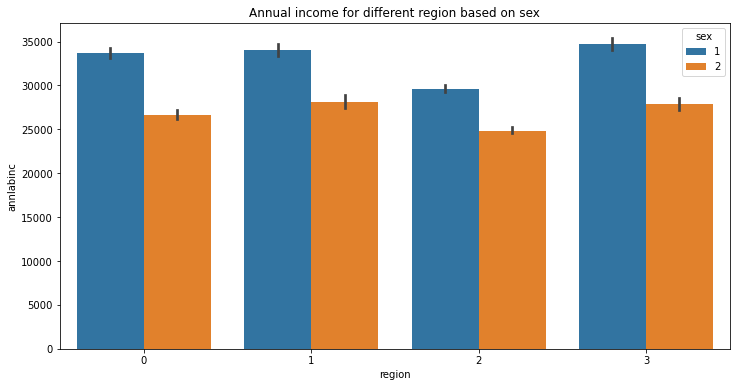

In [93]:
earnings_4 = plt.subplots(figsize=(12, 6))
earnings_4 =sns.barplot(x=psid['region'], y=psid['annlabinc'], hue=psid['sex']).set(title= 'Annual income for different region based on sex')
plt.show(earnings_4)

distribution of labor income

,sumsquare_error,aic,bic,kl_div
chi2,8.060257e-09,2293.168445,-706814.281231,0.201178
lognorm,8.262819e-09,2295.274524,-706203.972164,0.208444
norm,9.189960e-09,2297.995440,-703599.146823,0.242146
expon,1.628315e-08,2296.713467,-689533.770418,0.431086


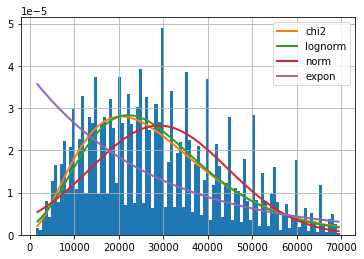

In [53]:
f = Fitter(psid.annlabinc,
           distributions=['lognorm',
                          "norm", "expon","chi2"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
chi2,1.633660e-08,2298.025637,-6.542803e+06,0.357876
norm,1.795617e-08,2296.282456,-6.522347e+06,0.428105
expon,2.620536e-08,2295.932814,-6.440488e+06,0.662587
lognorm,5.159106e-08,2791.470913,-6.293795e+06,3.547093


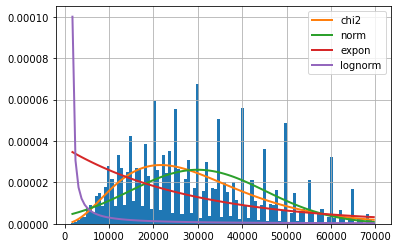

In [54]:
f_1 = Fitter(cps.annlabinc,
           distributions=['lognorm',
                          "norm", "expon","chi2"])
f_1.fit()
f_1.summary()

The labor income distribution is skewed to the right, meaning that a small amount of people will make a lot of money. In order to focus our analysis in the overall population we filter out the 10% highest incomes by selecting the 90th percentile.

Count of male and female in the dataset

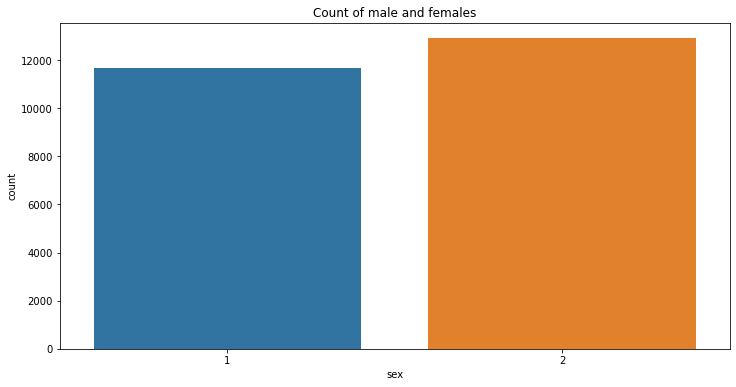

In [55]:
sex_count = plt.subplots(figsize=(12, 6))
sex_count = sns.countplot(x = psid['sex']).set(title = 'Count of male and females')

Count of each race

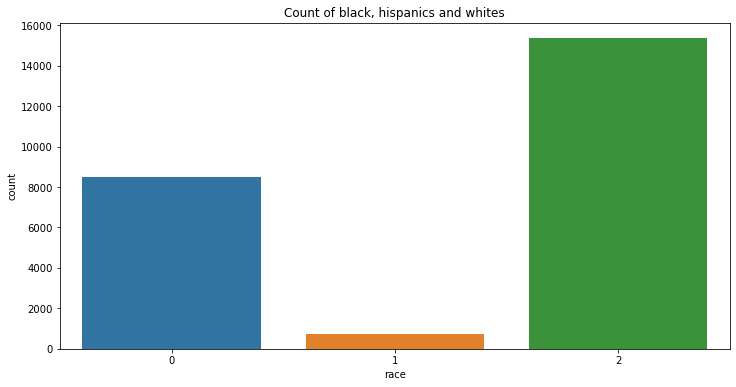

In [56]:
race_count = plt.subplots(figsize=(12, 6))
race_count = sns.countplot(x = psid['race']).set(title = 'Count of black, hispanics and whites')

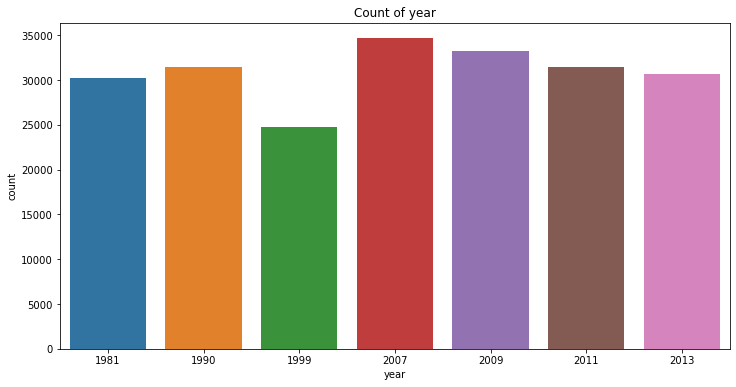

In [57]:
year_count = plt.subplots(figsize=(12, 6))
year_count = sns.countplot(x = cps['year']).set(title = 'Count of year')

Scatter and histogram plots

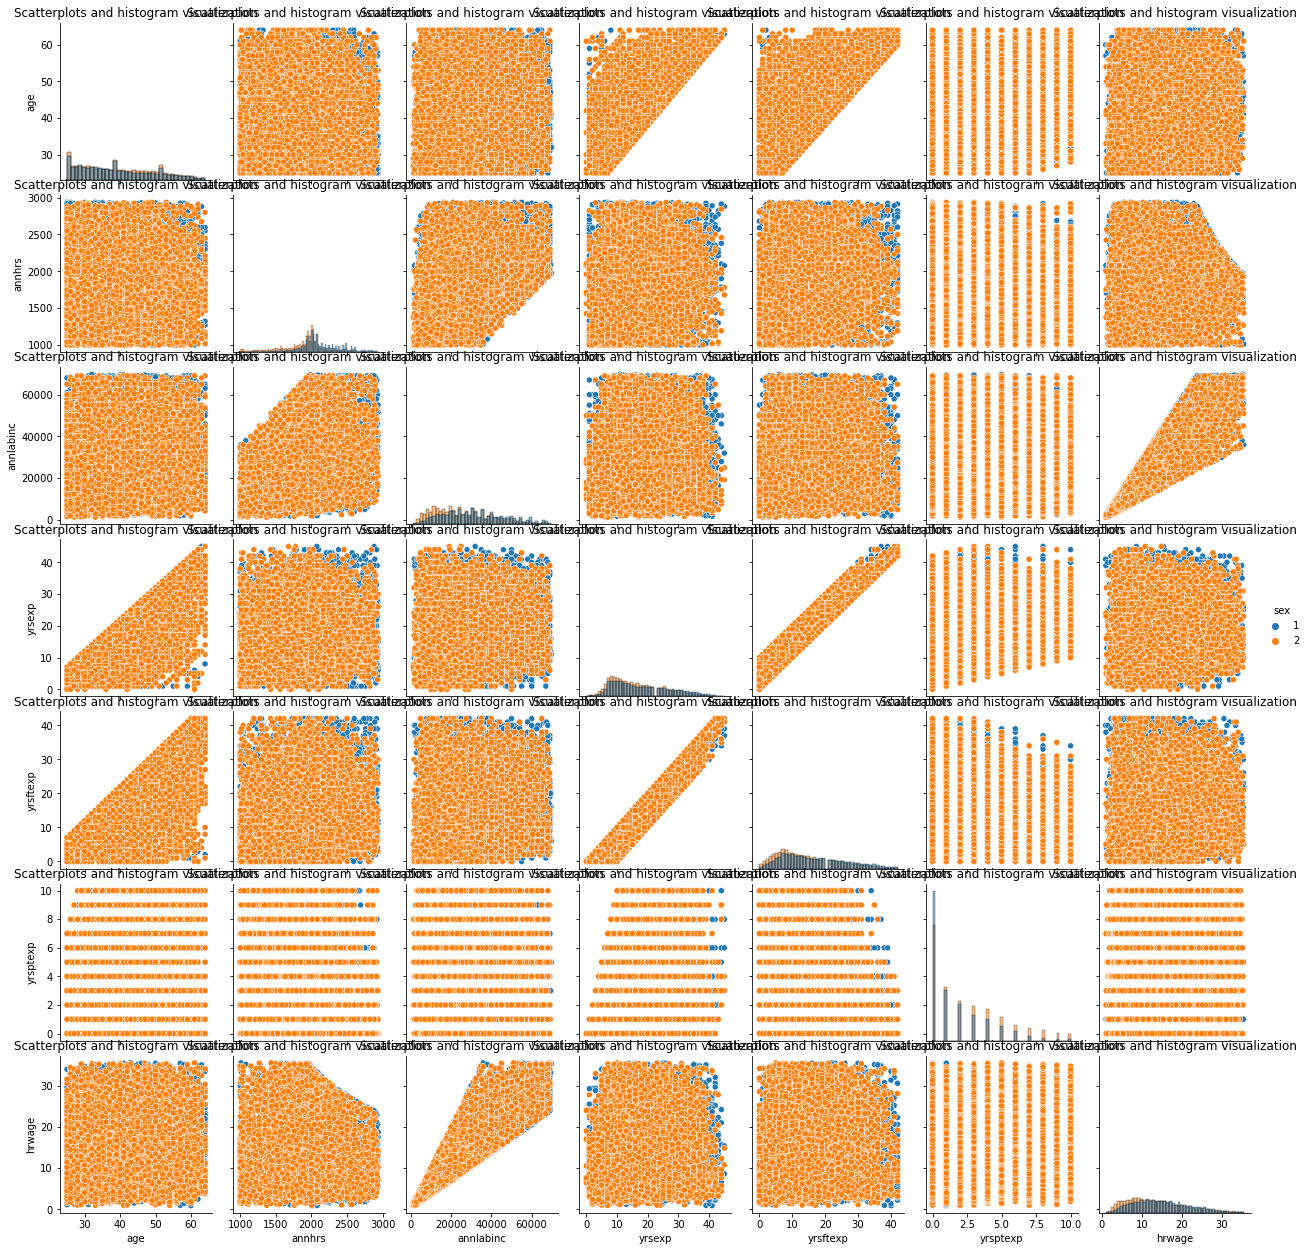

In [58]:
sca_hist = sns.PairGrid(psid, hue="sex").set(title= 'Scatterplots and histogram visualization')
sca_hist.map_diag(sns.histplot)
sca_hist.map_offdiag(sns.scatterplot)
sca_hist.add_legend()

My PC doesnt have the capacity to handle this data for this plot. If someone can do it and add it would be nice

In [59]:
#sca_hist_1 = sns.PairGrid(cps, hue="sex")
#sca_hist_1.map_diag(sns.histplot)
#sca_hist_1.map_offdiag(sns.scatterplot)
#sca_hist_1.add_legend()

Correlation Matrix

For PSID dataset

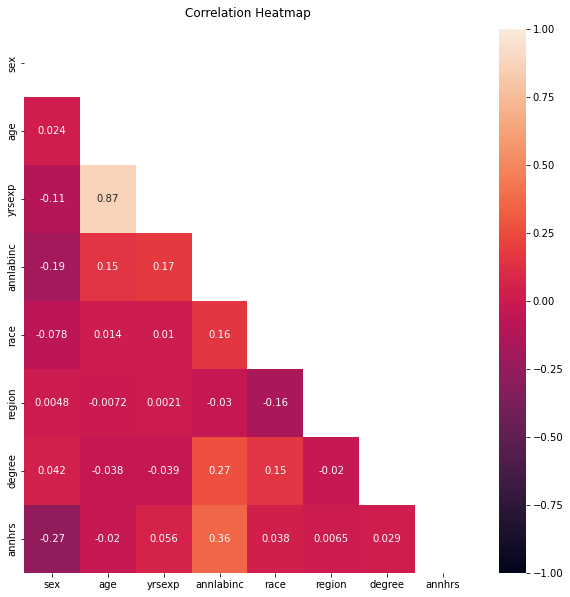

In [62]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(psid[['sex','age','yrsexp','annlabinc','race','region','degree','annhrs']].corr(), vmin=-1, vmax=1, annot=True,mask=np.triu(psid[['sex','age','yrsexp','annlabinc','race','region','degree','annhrs']].corr()))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Observations:

i)age has a strong positive relationship with years of experiance

ii)Sex has a strong negative relationship with race, which is interesting

iii)Region and degree does not seem to affect any of the other attributes, which in the case of degree is interesting

For CPS dataset

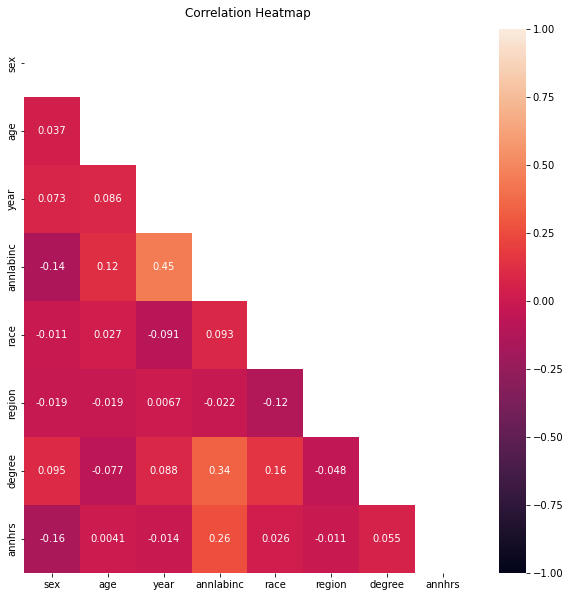

In [63]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(cps[['sex','age','year','annlabinc','race','region','degree','annhrs']].corr(), vmin=-1, vmax=1, annot=True,mask=np.triu(cps[['sex','age','year','annlabinc','race','region','degree','annhrs']].corr()))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [70]:
psid.describe()

,sex,age,annhrs,annlabinc,degree,yrsexp,yrsftexp,yrsptexp,hrwage,race,job,region
count,24589.000000,24589.000000,24589.000000,24589.000000,24589.000000,24589.000000,24589.000000,24589.000000,24589.000000,24589.000000,24589.000000,24589.000000
mean,1.525154,39.516288,2001.429501,29015.866729,0.259832,17.492334,15.436333,2.069869,14.444994,1.280207,11.397902,1.486884
std,0.499377,10.171769,367.022065,15430.689186,0.538759,9.170488,9.566357,2.461597,7.324235,0.943873,5.229292,1.031176
min,1.000000,25.000000,999.000000,1330.000000,0.000000,0.000000,0.000000,0.000000,0.892857,0.000000,0.000000,0.000000
25%,1.000000,31.000000,1840.000000,16618.000000,0.000000,10.000000,8.000000,0.000000,8.655127,0.000000,7.000000,0.000000
50%,2.000000,38.000000,2000.000000,27000.000000,0.000000,16.000000,14.000000,1.000000,13.480392,2.000000,13.000000,2.000000
75%,2.000000,47.000000,2196.000000,40000.000000,0.000000,24.000000,22.000000,3.000000,19.308487,2.000000,15.000000,2.000000
max,2.000000,64.000000,2937.000000,69708.000000,2.000000,45.000000,42.000000,10.000000,35.573124,2.000000,20.000000,3.000000


In [71]:
cps.describe()

,year,sex,age,annhrs,annlabinc,degree,hrwage,race,job,region
count,216540.000000,216540.000000,216540.000000,216540.000000,216540.000000,216540.000000,216540.000000,216540.000000,216540.000000,216540.000000
mean,2001.722458,1.513286,41.344768,2031.607398,29959.169964,1.165175,14.690165,1.622236,11.064972,1.588122
std,11.132582,0.499825,10.484411,177.879234,15284.992779,0.562988,7.338757,0.671698,5.264623,1.104080
min,1981.000000,1.000000,25.000000,1430.000000,1440.000000,0.000000,0.865385,0.000000,0.000000,0.000000
25%,1990.000000,1.000000,32.000000,2080.000000,18000.000000,1.000000,8.894231,1.000000,7.000000,1.000000
50%,2007.000000,2.000000,41.000000,2080.000000,28000.000000,1.000000,13.500000,2.000000,12.000000,2.000000
75%,2011.000000,2.000000,50.000000,2080.000000,40000.000000,2.000000,19.230770,2.000000,15.000000,3.000000
max,2013.000000,2.000000,64.000000,2470.000000,69962.000000,2.000000,35.326088,2.000000,20.000000,3.000000


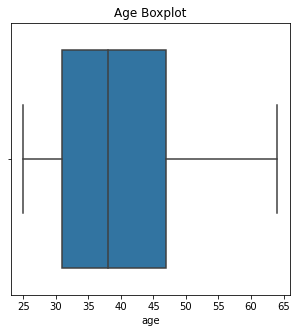

In [78]:
psid_box_1 = plt.figure(figsize=(5,5))
psid_box_1 = sns.boxplot(x = 'age', data=psid).set(title='Age Boxplot')

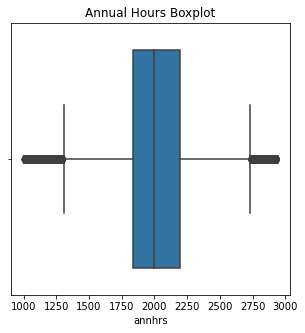

In [79]:
psid_box_2 = plt.figure(figsize=(5,5))
psid_box_2 = sns.boxplot(x = 'annhrs', data=psid).set(title='Annual Hours Boxplot')

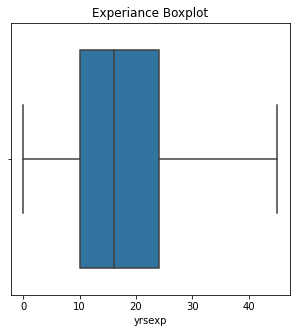

In [80]:
psid_box_3 = plt.figure(figsize=(5,5))
psid_box_3 = sns.boxplot(x = 'yrsexp', data=psid).set(title='Experiance Boxplot')

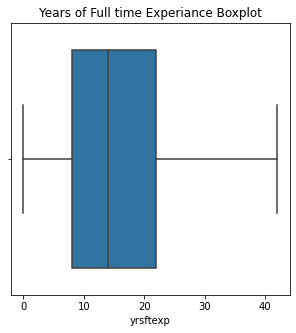

In [81]:
psid_box_4 = plt.figure(figsize=(5,5))
psid_box_4 = sns.boxplot(x = 'yrsftexp', data=psid).set(title='Years of Full time Experiance Boxplot')

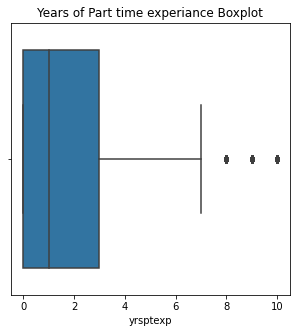

In [82]:
psid_box_5 = plt.figure(figsize=(5,5))
psid_box_5 = sns.boxplot(x = 'yrsptexp', data=psid).set(title='Years of Part time experiance Boxplot')

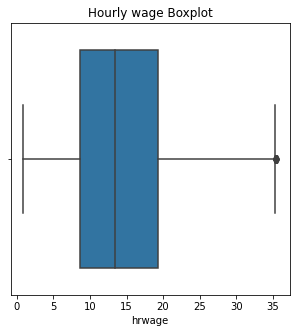

In [83]:
psid_box_6 = plt.figure(figsize=(5,5))
psid_box_6 = sns.boxplot(x = 'hrwage', data=psid).set(title='Hourly wage Boxplot')

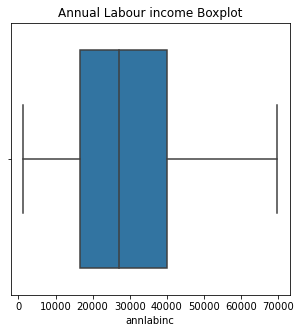

In [84]:
psid_box_7 = plt.figure(figsize=(5,5))
psid_box_7 = sns.boxplot(x = 'annlabinc', data=psid).set(title='Annual Labour income Boxplot')

### Outliers in CPS Dataset

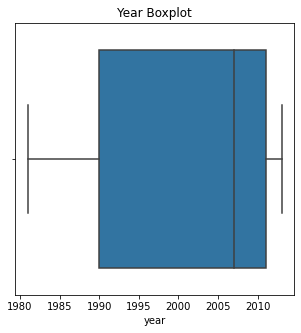

In [85]:
psid_box_1_1 = plt.figure(figsize=(5,5))
psid_box_1_1 = sns.boxplot(x = 'year', data=cps).set(title='Year Boxplot')

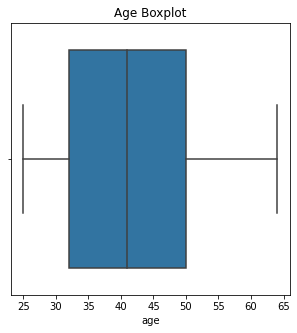

In [86]:
psid_box_1_2 = plt.figure(figsize=(5,5))
psid_box_1_2 = sns.boxplot(x = 'age', data=cps).set(title='Age Boxplot')

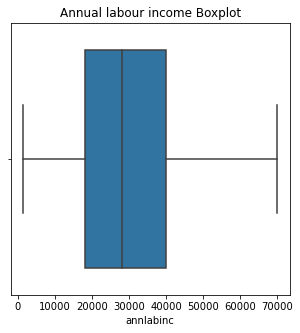

In [88]:
psid_box_1_4 = plt.figure(figsize=(5,5))
psid_box_1_4 = sns.boxplot(x = 'annlabinc', data=cps).set(title='Annual labour income Boxplot')

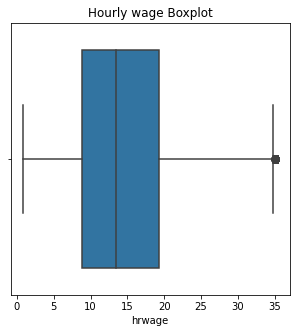

In [89]:
psid_box_1_5 = plt.figure(figsize=(5,5))
psid_box_1_5 = sns.boxplot(x = 'hrwage', data=cps).set(title='Hourly wage Boxplot')